In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Datasets/Kitap1.csv")

In [40]:
df

,player_id,player_name,season_date,team_name,competitoin,played_match,team_played_match,minutes_played,goals,xG,assists,xA,shoots,touches_pm,minutes_per_goal,shoot_goal_ratio,shoots_per_match
0,1,Mauro Icardi,2023/2024,Galatasaray,Trendyol Super Lig,34,38,2856,25,21.23,8,3.77,104,23.9,114.24,24.04,3.06
1,2,Edin Dzeko,2023/2024,Fenerbahce,Trendyol Super Lig,36,38,2736,21,21.64,3,5.15,124,38.1,130.29,16.94,3.44
2,3,Rey Manaj,2023/2024,EMS Yapi Sivasspor,Trendyol Super Lig,32,38,2432,18,14.34,3,1.48,89,18.7,135.11,20.22,2.78
3,4,Ciro Immobile,2023/2024,Lazio,Serie A,31,38,1674,7,9.77,1,1.33,31,21.0,239.14,22.58,1.00
4,5,Youssef En-Nesyri,2023/2024,Sevilla,La Liga,33,38,2574,16,10.80,2,0.85,63,16.0,160.88,25.40,1.91
5,6,Michy Batshuayi,2023/2024,Fenerbahce,Trendyol Super Lig,27,38,810,12,11.23,1,1.31,16,10.0,67.50,75.00,0.59


In [27]:
#minutes per goal
df["minutes_per_goal"] = round(df.minutes_played / df.goals, 2)
#the ratio of shots taken to goals scored
df["shoot_goal_ratio"] = round(df.goals / df.shoots * 100,2)

df.loc[:,["player_name","played_match","goals","xG","minutes_per_goal","shoots","shoot_goal_ratio"]]

,player_name,played_match,goals,xG,minutes_per_goal,shoots,shoot_goal_ratio
0,Mauro Icardi,34,25,21.23,114.24,104,24.04
1,Edin Dzeko,36,21,21.64,130.29,124,16.94
2,Rey Manaj,32,18,14.34,135.11,89,20.22
3,Ciro Immobile,31,7,9.77,239.14,31,22.58
4,Youssef En-Nesyri,33,16,10.80,160.88,63,25.40
5,Michy Batshuayi,27,12,11.23,67.50,16,75.00


In [36]:
#maç başına şut
df["shoots_per_match"] = round(df.shoots / df.played_match, 2)
df.loc[:,["player_name","shoots","shoots_per_match"]]

,player_name,shoots,shoots_per_match
0,Mauro Icardi,104,3.06
1,Edin Dzeko,124,3.44
2,Rey Manaj,89,2.78
3,Ciro Immobile,31,1.00
4,Youssef En-Nesyri,63,1.91
5,Michy Batshuayi,16,0.59


In [42]:
df.dtypes

player_id              int64
player_name           object
season_date           object
team_name             object
competitoin           object
played_match           int64
team_played_match      int64
minutes_played         int64
goals                  int64
xG                   float64
assists                int64
xA                   float64
shoots                 int64
touches_pm           float64
minutes_per_goal     float64
shoot_goal_ratio     float64
shoots_per_match     float64
dtype: object

In [44]:
df.player_name = pd.Categorical(df.player_name)
df.season_date = pd.Categorical(df.season_date)
df.team_name = pd.Categorical(df.team_name)

In [46]:
#We categorized the objects

In [48]:
#the Radar Charts - Polar Histograms

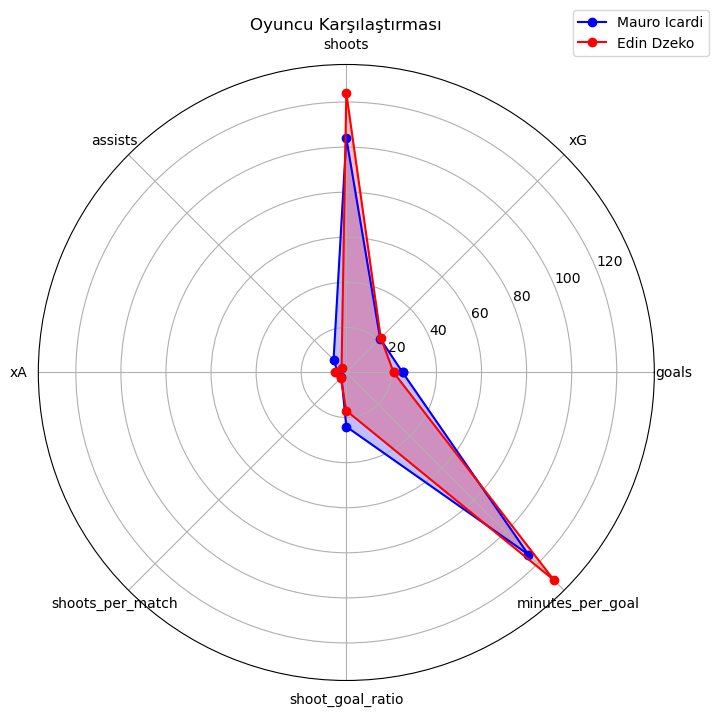

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cols = [ "goals", "xG","shoots","assists","xA","shoots_per_match","shoot_goal_ratio","minutes_per_goal"]


# 360 dereceyi uygun şekilde böl
angles = np.linspace(0, 2*np.pi, len(cols), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # İlk açıyla son açıyı birleştir

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# İlk oyuncunun verilerini alalım ve çizeleim
data_1 = df.loc[0, cols].values
name_1 = df.loc[0, "player_name"]
stats_1 = np.concatenate((data_1, [data_1[0]]))  # İlk veriyle son veriyi birleştir
ax.plot(angles, stats_1, "o-", label=name_1, color='blue')
ax.fill(angles, stats_1, alpha=0.25, color='blue')

# İkinci oyuncunun verilerini alalım ve çizeleim
data_2 = df.loc[1, cols].values
name_2 = df.loc[1, "player_name"]
stats_2 = np.concatenate((data_2, [data_2[0]]))  # İlk veriyle son veriyi birleştir
ax.plot(angles, stats_2, "o-", label=name_2, color='red')
ax.fill(angles, stats_2, alpha=0.25, color='red')

# Etiketleri ekle
ax.set_thetagrids(angles[:-1] * 180/np.pi, cols)

# Başlık ve gösterge ekle
plt.title("Oyuncu Karşılaştırması")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

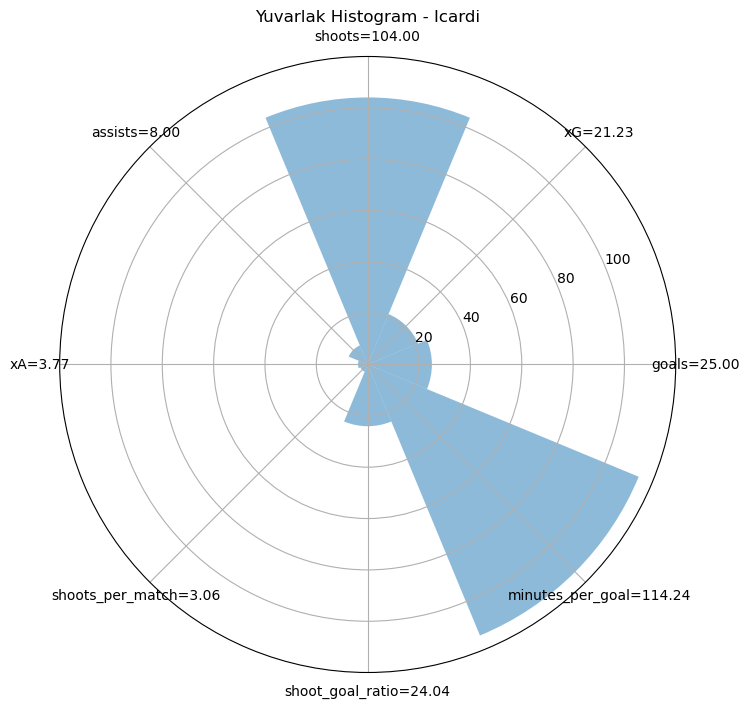

In [58]:

cols = [ "goals", "xG","shoots","assists","xA","shoots_per_match","shoot_goal_ratio","minutes_per_goal"]

# Veri seçimi
player_index = 0  # İstediğiniz oyuncunun indexini buradan değiştirebilirsiniz
values = df.loc[player_index, cols].values

# 360 dereceyi uygun şekilde böl
angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()

# Yuvarlak histogram
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Çubuk genişliği
width = 2 * np.pi / len(cols)

# Her bir çubuğu çizin
bars = ax.bar(angles, values, width=width, bottom=0.0, alpha=0.5)

# Etiketleri ekle ve yanlarına eşittir işareti ile değerleri yaz
labels = [f'{col}={value:.2f}' for col, value in zip(cols, values)]
ax.set_thetagrids(np.degrees(angles), labels)

# Başlık ekle
plt.title("Yuvarlak Histogram - Icardi")

plt.show()


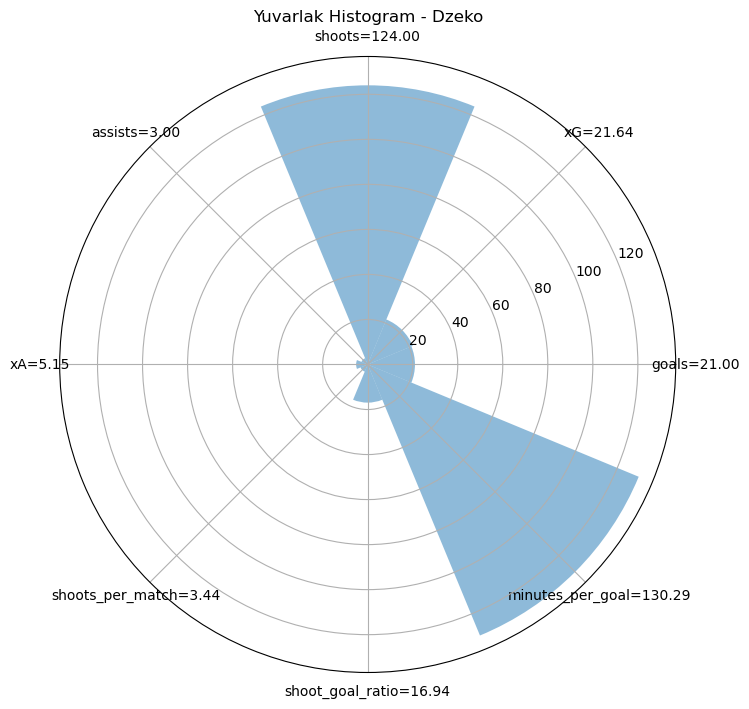

In [60]:
cols = [ "goals", "xG","shoots","assists","xA","shoots_per_match","shoot_goal_ratio","minutes_per_goal"]

# Veri seçimi
player_index = 1  # İstediğiniz oyuncunun indexini buradan değiştirebilirsiniz
values = df.loc[player_index, cols].values

# 360 dereceyi uygun şekilde böl
angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()

# Yuvarlak histogram
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Çubuk genişliği
width = 2 * np.pi / len(cols)

# Her bir çubuğu çizin
bars = ax.bar(angles, values, width=width, bottom=0.0, alpha=0.5)

# Etiketleri ekle ve yanlarına eşittir işareti ile değerleri yaz
labels = [f'{col}={value:.2f}' for col, value in zip(cols, values)]
ax.set_thetagrids(np.degrees(angles), labels)

# Başlık ekle
plt.title("Yuvarlak Histogram - Dzeko")

plt.show()

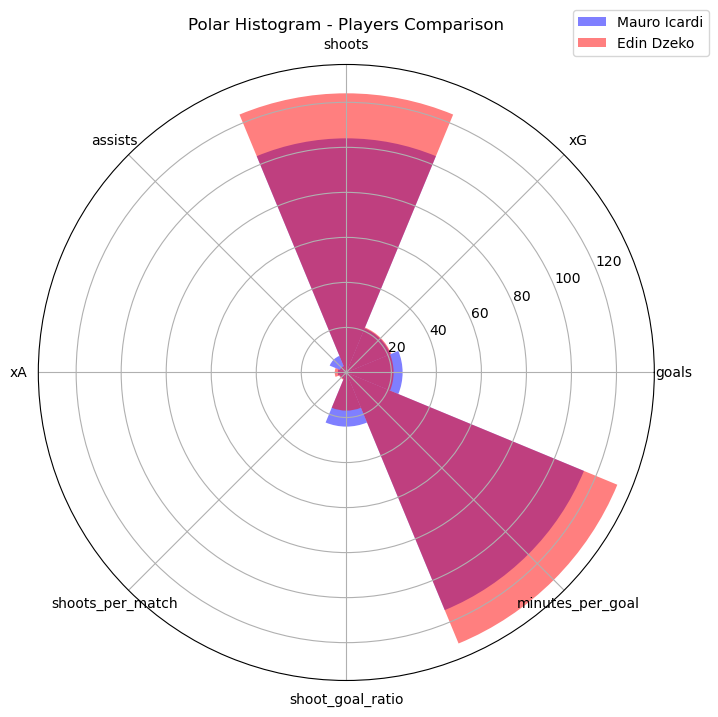

In [62]:

cols = [ "goals", "xG","shoots","assists","xA","shoots_per_match","shoot_goal_ratio","minutes_per_goal"]

# Select data for players
values_player1 = df.loc[0, cols].values
values_player2 = df.loc[1, cols].values

# Divide 360 degrees into equal parts
angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the circle

# Repeat the first value to close the circle for values
values_player1 = np.concatenate((values_player1, [values_player1[0]]))
values_player2 = np.concatenate((values_player2, [values_player2[0]]))

# Polar histogram
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Width of each bar
width = 2 * np.pi / len(cols)

# Draw each bar for player 1
bars1 = ax.bar(angles[:-1], values_player1[:-1], width=width, bottom=0.0, alpha=0.5, label=df.loc[0, "player_name"], color='blue')

# Draw each bar for player 2
bars2 = ax.bar(angles[:-1], values_player2[:-1], width=width, bottom=0.0, alpha=0.5, label=df.loc[1, "player_name"], color='red')

# Add labels with values next to each bar
labels = [f'{col}' for col in cols]
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Add title and legend
plt.title("Polar Histogram - Players Comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


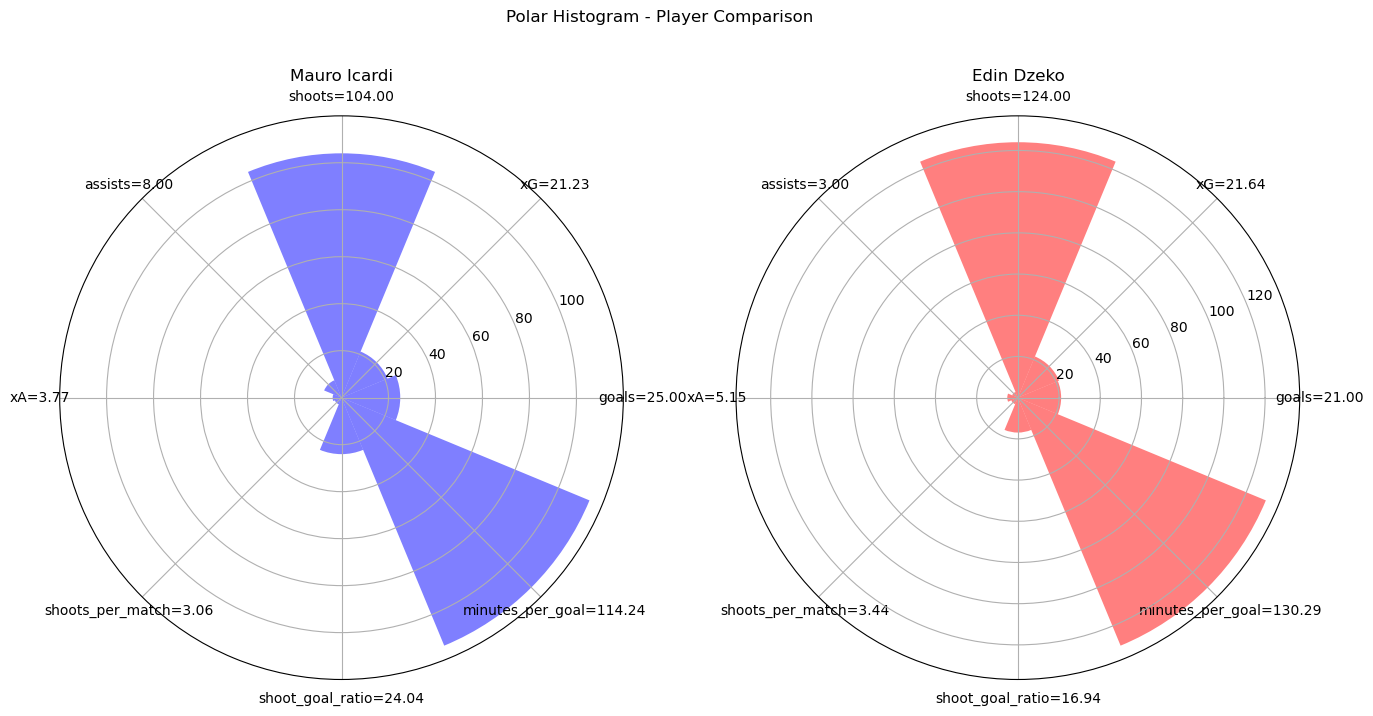

In [64]:


cols = [ "goals", "xG","shoots","assists","xA","shoots_per_match","shoot_goal_ratio","minutes_per_goal"]

# Select data for players
values_player0 = df.loc[0, cols].values
values_player1 = df.loc[1, cols].values

# Divide 360 degrees into equal parts
angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the circle

# Repeat the first value to close the circle for values
values_player0 = np.concatenate((values_player0, [values_player0[0]]))
values_player1 = np.concatenate((values_player1, [values_player1[0]]))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))

# Width of each bar
width = 2 * np.pi / len(cols)

# Plot for player 0
ax1.bar(angles[:-1], values_player0[:-1], width=width, bottom=0.0, alpha=0.5, color='blue')
ax1.set_title(df.loc[0, "player_name"])
ax1.set_thetagrids(np.degrees(angles[:-1]), labels=[f'{col}={value:.2f}' for col, value in zip(cols, values_player0[:-1])])

# Plot for player 1
ax2.bar(angles[:-1], values_player1[:-1], width=width, bottom=0.0, alpha=0.5, color='red')
ax2.set_title(df.loc[1, "player_name"])
ax2.set_thetagrids(np.degrees(angles[:-1]), labels=[f'{col}={value:.2f}' for col, value in zip(cols, values_player1[:-1])])

# Set main title
plt.suptitle("Polar Histogram - Player Comparison")

plt.show()
